# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [389]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [390]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [58]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8', decimal=',') 

In [ ]:
df_train.shape

In [59]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8', decimal=',')

In [ ]:
df_test.shape

In [ ]:
df_train.head()

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [60]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [61]:
df = df_test.append(df_train).reset_index(drop=True)

In [ ]:
df.shape

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [ ]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [32]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

AttributeError: 'float' object has no attribute 'replace'

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [356]:

df.isnull().sum() #название столбцов и кол-во пропусков данных в них

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

*Исходя из данных и их расшифровки, можно заметить:
 1. 
GEN_INDUSTRY                   
GEN_TITLE                      
ORG_TP_STATE                   
ORG_TP_FCAPITAL                
JOB_DIR                        
    **скорее всего это одни и те же люди(кол-во пропусков в каждом из столбцов одинаковое, и все столбцы содержат инф-ию о работе клиента), поскольку кол-во этих людей примерно 10 % от основной выборки ими можно принебречь
    или по методу к-ближайших соседей заполнить пропуски**

*2.
TP_PROVINCE                     
    **эти данные можно взять из полей, поскольку большая часть данных имеет одинаковое значение в этих столбцах**
REG_ADDRESS_PROVINCE            
FACT_ADDRESS_PROVINCE             
POSTAL_ADDRESS_PROVINCE  

*3.
REGION_NM  
    **С учетом, того что мы принебрегли 10 % выборки, этим параметрои тоже можно принебречь**
    
                            ***По факту, если не учитывать пункт 1, можно не учитывать все остальные пропуски***
                            
                            PREVIOUS_CARD_NUM_UTILIZED приравняем к 0, т.к. в описании пропуск - это значение 0
    

In [357]:
for i in df.columns: # перебираем все столбцы
    if df[i].isnull().sum() > 0: # столбцы с кол-вом пропусков > 0
        print(i) # выводим название столбца
    

GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
TP_PROVINCE
REGION_NM
WORK_TIME
PREVIOUS_CARD_NUM_UTILIZED


In [40]:
#Учтем, что хотели удалить строки с пропусками
values = {'PREVIOUS_CARD_NUM_UTILIZED': 0}
df = df.fillna(value=values)
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26840 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  26840 non-null int64
TARGET                        26840 non-null int64
AGE                           26840 non-null int64
SOCSTATUS_WORK_FL             26840 non-null int64
SOCSTATUS_PENS_FL             26840 non-null int64
GENDER                        26840 non-null int64
CHILD_TOTAL                   26840 non-null int64
DEPENDANTS                    26840 non-null int64
EDUCATION                     26840 non-null object
MARITAL_STATUS                26840 non-null object
GEN_INDUSTRY                  26840 non-null object
GEN_TITLE                     26840 non-null object
ORG_TP_STATE                  26840 non-null object
ORG_TP_FCAPITAL               26840 non-null object
JOB_DIR                       26840 non-null object
FAMILY_INCOME                 26840 non-null object
PERSONAL_INCOME               26840 non-null float64
REG_ADDRESS_PR

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
# Категоральные данные найдем с помощью проверки типа данных 
# Заменим категоральные данные с помощью get_dummies,
# если кол-во различных значений в столбце будет слишком высоко, удалим столбцы, которые несут наименее важную информацию

""""for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        df = pd.get_dummies(df, columns=[i]) 
        print(i) # выводим название столбца """

# данный метод привел к ошибке в памяти, а значит:
# или кол-во различных значений в столбце будет слишком высоко
# НО, сначала следует заменить все запятые на точки, только потом проверять, так и сделаем:

Заметим, что категоральные данные - это, на самом деле, числовые данные, просто с запятой вместо точки, поэтому сначала следует заменить, а затем искать категоральные

In [62]:
# Избавляемся от проблем с '.' и ',' 
# избавились в начале файла, сразу, когда считываем его (decimal=',')
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца 

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM
WORK_TIME
PREVIOUS_CARD_NUM_UTILIZED
sample


In [63]:
df = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_TITLE', 'ORG_TP_STATE', 'FAMILY_INCOME', 'FACT_ADDRESS_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED'])
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,ORG_TP_FCAPITAL,...,FACT_ADDRESS_PROVINCE_Читинская область,FACT_ADDRESS_PROVINCE_Чувашия,FACT_ADDRESS_PROVINCE_Эвенкийский АО,FACT_ADDRESS_PROVINCE_Якутия,FACT_ADDRESS_PROVINCE_Ямало-Ненецкий АО,FACT_ADDRESS_PROVINCE_Ярославская область,PREVIOUS_CARD_NUM_UTILIZED_1.0,PREVIOUS_CARD_NUM_UTILIZED_2.0,PREVIOUS_CARD_NUM_UTILIZED_1.0,PREVIOUS_CARD_NUM_UTILIZED_2.0
0,59909969,0,30,1,0,1,1,1,Образование,Без участия,...,0,0,0,0,0,0,0,0,0,0
1,59910420,0,48,0,1,1,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,59911223,0,35,1,0,0,1,0,Металлургия/Промышленность/Машиностроение,Без участия,...,0,0,0,0,0,0,0,0,0,0
3,59911322,0,22,1,0,0,0,0,Другие сферы,Без участия,...,1,0,0,0,0,0,0,0,0,0
4,59911438,0,27,1,0,1,2,2,Образование,Без участия,...,0,0,0,0,0,0,0,0,0,0


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [350]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8', decimal=',') 
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8', decimal=',')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [351]:
def preproc_data(df_input):
    df_output = df_input.copy()      
    # Удалили признаки
    df_output = df_output.drop(['GEN_INDUSTRY', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 
                    'REGION_NM', 'WORK_TIME', 'AGREEMENT_RK'], axis =1)
    # т.к. пропуск - это 0 карт
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 
                                                            'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    # удаляем строки с пропусками
    df_output = df_output.dropna()
    
    # Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'FAMILY_INCOME', 'FACT_ADDRESS_PROVINCE'])
   
    return df_output


In [391]:
df_preproc = df.pipe(preproc_data)
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,FACT_ADDRESS_PROVINCE_Хакасия,FACT_ADDRESS_PROVINCE_Ханты-Мансийский АО,FACT_ADDRESS_PROVINCE_Челябинская область,FACT_ADDRESS_PROVINCE_Чечня,FACT_ADDRESS_PROVINCE_Читинская область,FACT_ADDRESS_PROVINCE_Чувашия,FACT_ADDRESS_PROVINCE_Эвенкийский АО,FACT_ADDRESS_PROVINCE_Якутия,FACT_ADDRESS_PROVINCE_Ямало-Ненецкий АО,FACT_ADDRESS_PROVINCE_Ярославская область
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,57,1,0,1,0,0,10000.0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [353]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [360]:
df_y_train = df_train_preproc['TARGET']
df_X_train = df_train_preproc.drop('TARGET', axis = 1)
#для каждой выборки
df_y_test = df_test_preproc['TARGET']
df_X_test = df_train_preproc.drop('TARGET', axis = 1)


#### Задание 5. Обучение и оценка качества разных моделей

In [361]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(df_X_train, df_y_train, test_size=0.33, random_state=42)
# пока что берем только данные из первого файла (train)


In [362]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [395]:
# LogisticRegression()
model_LR = LogisticRegression()                     # инициализируем модель
model_LR.fit(X_train, y_train)                                 # обучаем модель
predict_LR = model_LR.predict(X_test)                      # делаем предсказание
predict_proba_LR = model_LR.predict_proba(X_test)                 # вероятность
# DecisionTreeClassifier()
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)                                 # обучаем модель
predict_DTC = model_DTC.predict(X_test)                      # делаем предсказание
predict_proba_DTC = model_DTC.predict_proba(X_test)               # вероятность
# RandomForestClassifier()
model_RFС = RandomForestClassifier()
model_RFС.fit(X_train, y_train)                                 # обучаем модель
predict_RFC = model_RFС.predict(X_test)                      # делаем предсказание
predict_proba_RFC = model_RFС.predict_proba(X_test)               # вероятность

In [ ]:
len()

In [401]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
# LogisticRegression()
print('precision for LR', precision_score(y_test, predict_LR))
print('recall for LR', recall_score(y_test, predict_LR))
print('accuracy for LR', accuracy_score(y_test, predict_LR))
# DecisionTreeClassifier()
print('precision for DTC', precision_score(y_test, predict_DTC))
print('recall for DTC', recall_score(y_test, predict_DTC))
print('accuracy for DTC', accuracy_score(y_test, predict_DTC))
# RandomForestClassifier()
print('precision for RFC', precision_score(y_test, predict_RFC))
print('recall for RFC', recall_score(y_test, predict_RFC))
print('accuracy for RFC', accuracy_score(y_test, predict_RFC))

## Your Code Here

precision for LR 0.0
recall for LR 0.0
accuracy for LR 0.8753553465996063
precision for DTC 0.16859504132231404
recall for DTC 0.17989417989417988
accuracy for DTC 0.7883227640498579
precision for RFC 0.047619047619047616
recall for RFC 0.001763668430335097
accuracy for RFC 0.8718565493111743


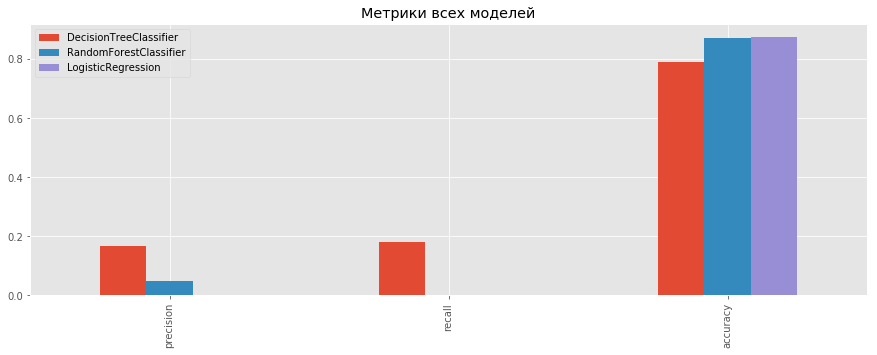

In [420]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

from matplotlib import pyplot as plt


Metric_df = pd.DataFrame(data = {'DecisionTreeClassifier':[precision_score(y_test, predict_DTC), recall_score(y_test, predict_DTC), accuracy_score(y_test, predict_DTC)],
                                 'RandomForestClassifier':[precision_score(y_test, predict_RFC), recall_score(y_test, predict_RFC), accuracy_score(y_test, predict_RFC)],
                                 'LogisticRegression': [precision_score(y_test, predict_LR), recall_score(y_test, predict_LR), accuracy_score(y_test, predict_LR)]}, 
                         index=['precision', 'recall', 'accuracy'] )

Metric_df.plot(kind='bar',title = 'Метрики всех моделей', figsize=(15,5), legend=True)
## Your Code Here

LR 0.5846177823212272    DTC 0.5271662611902254    RFC 0.5704549436867626


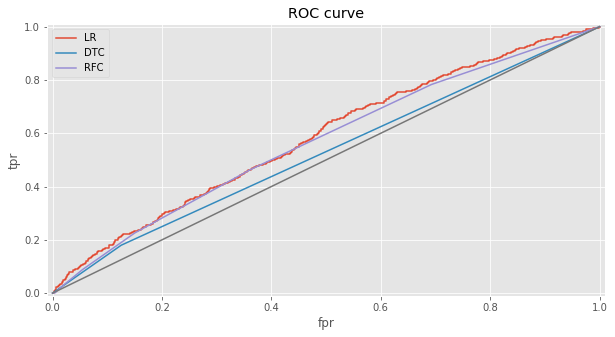

In [455]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score_LR = roc_auc_score(y_test, predict_proba_LR[:,1])
roc_auc_score_DTC = roc_auc_score(y_test, predict_proba_DTC[:,1])
roc_auc_score_RFC = roc_auc_score(y_test, predict_proba_RFC[:,1])
print('LR',roc_auc_score_LR, '   DTC', roc_auc_score_DTC, '   RFC', roc_auc_score_RFC)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, predict_proba_LR[:,1])
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(y_test, predict_proba_DTC[:,1])
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, predict_proba_RFC[:,1])
plt.figure(figsize=(10, 5))
plt.plot(fpr_LR, tpr_LR, label = 'LR')
plt.plot(fpr_DTC, tpr_DTC, label = 'DTC')
plt.plot(fpr_RFC, tpr_RFC, label = 'RFC')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()


## Your Code Here

In [397]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
cross_val_score_rfc = cross_val_score(
    dtc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('RandomForestClassifier кросс-валидация ', cross_val_score_rfc.mean())
cross_val_score_dtc = cross_val_score(
    rfc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('DecisionTreeClassifier кросс-валидация ', cross_val_score_dtc.mean())
cross_val_score_lr = cross_val_score(
    lr,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('LogisticRegression кросс-валидация ', cross_val_score_lr.mean())

## Your Code Here


RandomForestClassifier кросс-валидация  0.5003291348695929
DecisionTreeClassifier кросс-валидация  0.5754575595980287
LogisticRegression кросс-валидация  0.5930954644638404


In [497]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

df_X_test = df_test_preproc.drop('TARGET', axis = 1)
# RandomForestClassifier()
model_RFС = RandomForestClassifier()
model_RFС.fit(df_X_test, df_y_test)                                 # обучаем модель
predict_RFC_test = model_RFС.predict(df_X_test)                      # делаем предсказание
predict_proba_RFC_test = model_RFС.predict_proba(df_X_test)              # вероятность

a = predict_RFC_test.tolist()
b = predict_proba_RFC_test[:,1].tolist()
df_test = pd.DataFrame(data = {'Предсказание': a, 'Вероятность':b})
df_test

,Предсказание,Вероятность
0,0,0.0
1,0,0.0
2,0,0.1
3,0,0.2
4,0,0.0
5,0,0.0
6,0,0.5
7,0,0.0
8,0,0.0
9,0,0.1


roc auc for test data:  0.9998180625923705


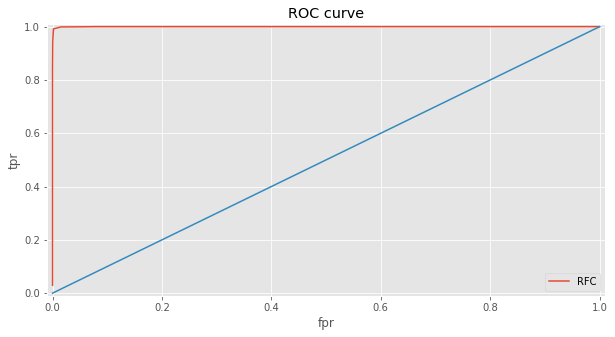

In [504]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

roc_auc_score_RFC = roc_auc_score(df_y_test, predict_proba_RFC_test[:,1])
print('roc auc for test data: ', roc_auc_score_RFC)
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(df_y_test, predict_proba_RFC_test[:,1])
plt.figure(figsize=(10, 5))
plt.plot(fpr_RFC, tpr_RFC, label = 'RFC')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность